In [58]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [66]:
data=pd.read_csv('file:///F:/heart%20(1).csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Profile'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='Profile',data=df)
plt.xticks(rotation=45)
df['Profile'].value_counts()

In [67]:
data.groupby(['target','sex']).median()

age   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
target sex                                                                      
0      0    60.5  0.0     140.0  265.5  0.0      0.0    145.5    1.0     1.60   
       1    57.5  0.0     130.0  247.5  0.0      0.0    141.0    1.0     1.40   
1      0    54.0  2.0     130.0  249.0  0.0      1.0    159.0    0.0     0.25   
       1    52.0  2.0     130.0  228.0  0.0      1.0    163.0    0.0     0.10   

            slope   ca  thal  
target sex                    
0      0      1.0  1.5   3.0  
       1      1.0  1.0   3.0  
1      0      2.0  0.0   2.0  
       1      2.0  0.0   2.0

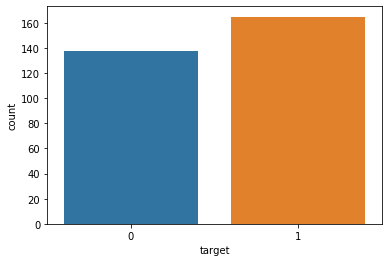

In [68]:
sns.countplot(data['target'])

In [69]:
pd.DataFrame(data.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose()

,target
exang,-0.436757
oldpeak,-0.430696
ca,-0.391724
thal,-0.344029
sex,-0.280937
age,-0.225439
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230


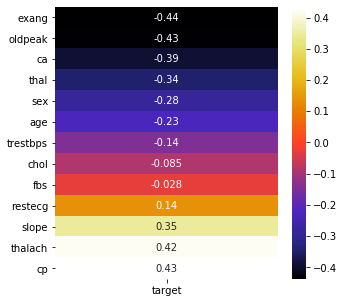

In [70]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(data.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose(),annot=True,cmap='CMRmap')

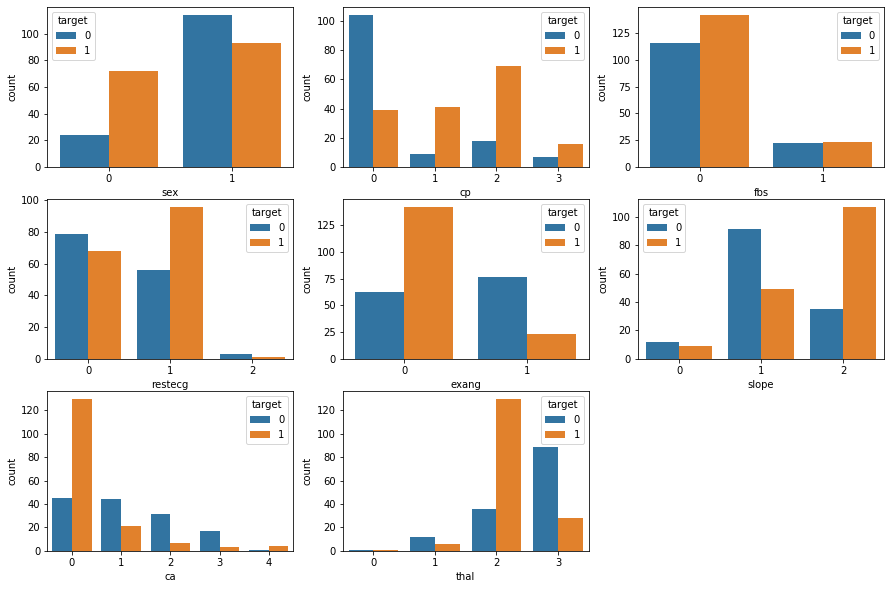

In [77]:
list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
m=1
plt.figure(figsize=(15,10))
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=data,hue='target')
    m+=1

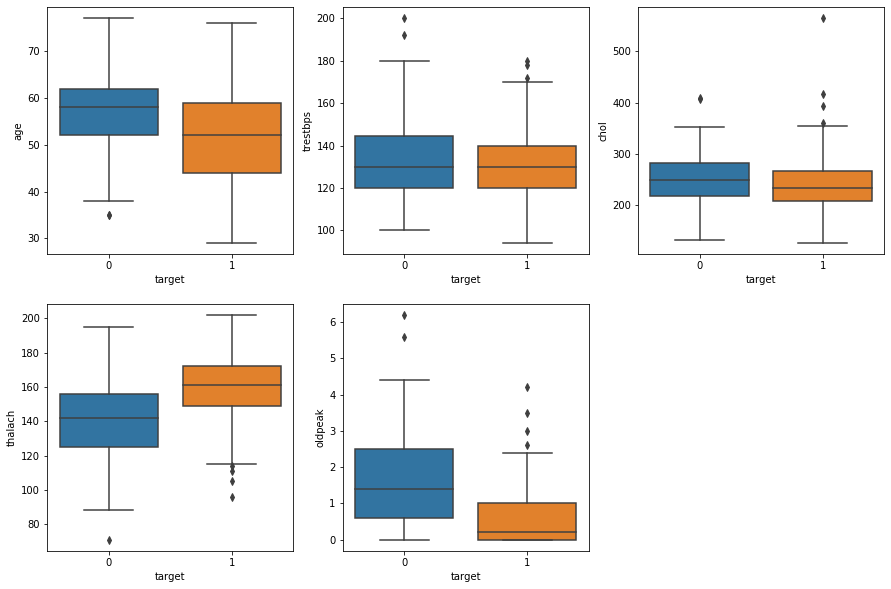

In [78]:
list = ['age','trestbps','chol','thalach','oldpeak']
m=1
plt.figure(figsize=(15,10))
for i in list:
    plt.subplot(2,3,m)
    sns.boxplot(y=i,data=data,x='target')
    m+=1

In [79]:
X = data.drop('target',axis=1)
Y = data['target']

,Scores,Importance (%)
Feature,,
thalach,188.320472,36.403
oldpeak,72.644253,14.042
ca,66.440765,12.843
cp,62.598098,12.100
exang,38.914377,7.522
chol,23.936394,4.627
age,23.286624,4.501
trestbps,14.823925,2.866
slope,9.804095,1.895


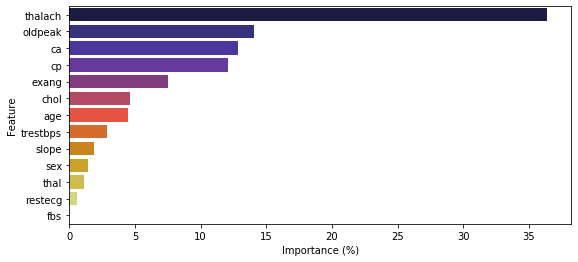

In [81]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='CMRmap')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data

In [82]:
X=X.drop(insignificant,axis=1)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [88]:
!pip install xgboost


  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [89]:
from sklearn.metrics import accuracy_score,classification_report

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train)
    predK = kn.predict(X_test)
    accuracy.append([accuracy_score(Y_test,predK),i])
    #print('Tested for k =',i)
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
knn = KNeighborsClassifier(n_neighbors=temp[1])

#SVM
from sklearn.svm import SVC
svc = SVC()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

print('Models Imported')

Models Imported


In [ ]:
model_acc = []
models = [xgb,lr,rfc,knn,svc,grid]
#model_name = ['xgb','lr','rfc','kno','svc','grid']
for i in models:
    i.fit(X_train,Y_train)
    model_acc.append(accuracy_score(Y_test,i.predict(X_test)))
                      
models = pd.DataFrame({'Models':models,'Accuracy':model_acc})

[08:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.776, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.792, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.708, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.796, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.755, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .